# 03 Exploratory Data Analysis (EDA)

## 3.1 Contents

    3.2 Introduction
    3.3 Imports
    3.4 Load the NBA Data
    3.5 Time for EDA!
        3.5.1 Conclusions
    3.6 Feature Engineering

## 3.2 Introduction

In this notebook, the goal is to be confidently familiar with the contents of the data frame and learn what the relationship between each feature is. By creating different plots and visually coming to conclusions based on the data collected in the 02 notebook, we will be able to develop a model that will be useful in predicting NBA players salaries, which was always the end goal.

Through this notebook, I want to be able to answer the questions:<br>
Do the team's W/L% affect player's salaries?<br>
What are some features that determine salary?<br>
Does position affect a higher salary?<br>
On average, what is the age group that has the highest salaries?<br>
Which team has the highest total salary?<br>

## 3.3 Imports

In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 3.4 Load the NBA Data

In [40]:
players_data = pd.read_csv('players_cleaned_final.csv').drop(columns = 'Unnamed: 0')

In [41]:
players_data.head()

,Player,Stats_Year,Ht,Wt,Colleges,Pos,Age,Tm,Team,G,...,PS/G,PA/G,SRS,Contract,rank,Contract_Year,Contract_Team,Salary,Salary Cap,League Weight
0,A.C. Green,1996,6-9,220.0,Oregon State,SF,32,PHO,Phoenix Suns,82,...,104.3,104.0,0.28,1,1,1997.0,Dallas Mavericks,5095088.0,26900000.0,0.189408
1,Aaron Brooks,2008,6-0,161.0,Oregon,PG,23,HOU,Houston Rockets,51,...,96.7,92.0,4.83,1,1,2009.0,Houston Rockets,1118520.0,57700000.0,0.019385
2,Aaron Gordon,2016,6-8,235.0,Arizona,PF,20,ORL,Orlando Magic,78,...,102.1,103.7,-1.68,1,2,2017.0,Orlando Magic,5504419.0,99093000.0,0.055548
3,Aaron Gray,2008,7-0,270.0,Pitt,C,23,CHI,Chicago Bulls,61,...,97.3,100.4,-3.19,1,1,2009.0,Chicago Bulls,1000497.0,57700000.0,0.017340
4,Aaron Harrison,2016,6-6,210.0,Kentucky,SG,21,CHO,Charlotte Hornets,21,...,103.4,100.7,2.36,1,1,2017.0,Charlotte Hornets,174570.0,99093000.0,0.001762


In [42]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1236 non-null   object 
 1   Stats_Year     1236 non-null   int64  
 2   Ht             1236 non-null   object 
 3   Wt             1236 non-null   float64
 4   Colleges       1236 non-null   object 
 5   Pos            1236 non-null   object 
 6   Age            1236 non-null   int64  
 7   Tm             1236 non-null   object 
 8   Team           1236 non-null   object 
 9   G              1236 non-null   int64  
 10  GS             1236 non-null   int64  
 11  MP             1236 non-null   float64
 12  FG             1236 non-null   float64
 13  FGA            1236 non-null   float64
 14  FG%            1236 non-null   float64
 15  3P             1236 non-null   float64
 16  3PA            1236 non-null   float64
 17  3P%            1236 non-null   float64
 18  2P      

In [43]:
players_data.describe()

,Stats_Year,Wt,Age,G,GS,MP,FG,FGA,FG%,3P,...,GB,PS/G,PA/G,SRS,Contract,rank,Contract_Year,Salary,Salary Cap,League Weight
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,...,1236.000000,1236.000000,1236.000000,1236.000000,1236.0,1236.000000,1236.000000,1.236000e+03,1.236000e+03,1236.000000
mean,2004.889159,220.101942,23.309871,53.881068,21.989482,18.531472,2.681796,6.026052,0.438368,0.425647,...,18.514159,98.524676,99.122735,-0.583172,1.0,1.181230,2005.961165,2.317988e+06,5.332047e+07,0.052842
std,7.576215,27.344631,3.377266,24.305770,27.177671,9.659266,1.892444,4.033694,0.088664,0.557726,...,13.626793,5.128409,5.213372,4.649100,0.0,1.115008,7.578584,2.372915e+06,2.522350e+07,0.069332
min,1996.000000,135.000000,18.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,81.900000,83.400000,-13.960000,1.0,1.000000,1997.000000,7.471000e+03,2.690000e+07,0.000220
25%,1997.000000,200.000000,21.000000,34.000000,0.000000,10.800000,1.275000,3.000000,0.399000,0.000000,...,7.000000,95.100000,95.900000,-3.860000,1.0,1.000000,1998.000000,9.472760e+05,3.000000e+07,0.016977
50%,2004.000000,220.000000,23.000000,61.000000,8.000000,16.750000,2.100000,4.900000,0.435000,0.200000,...,19.000000,98.300000,99.200000,-0.475000,1.0,1.000000,2005.000000,1.606860e+06,4.950000e+07,0.032846
75%,2011.000000,240.000000,24.000000,76.000000,39.000000,25.525000,3.700000,8.200000,0.480000,0.700000,...,28.000000,102.500000,102.725000,2.680000,1.0,1.000000,2013.000000,3.000000e+06,5.868000e+07,0.063807
max,2018.000000,325.000000,42.000000,82.000000,82.000000,42.200000,11.200000,22.600000,1.000000,3.300000,...,56.000000,115.900000,113.300000,11.800000,1.0,36.000000,2019.000000,3.314000e+07,1.091400e+08,1.231970


In [44]:
players_data.isnull().sum()

Player           0
Stats_Year       0
Ht               0
Wt               0
Colleges         0
Pos              0
Age              0
Tm               0
Team             0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%              0
3P               0
3PA              0
3P%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Pts Won          0
Pts Max          0
Share            0
W                0
L                0
W/L%             0
GB               0
PS/G             0
PA/G             0
SRS              0
Contract         0
rank             0
Contract_Year    0
Contract_Team    0
Salary           0
Salary Cap       0
League Weight    0
dtype: int64

## Time for EDA!

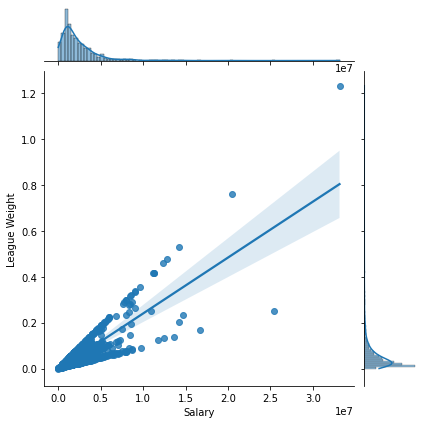

In [45]:
sns.jointplot(data=players_data, x='Salary', y='League Weight', kind="reg")

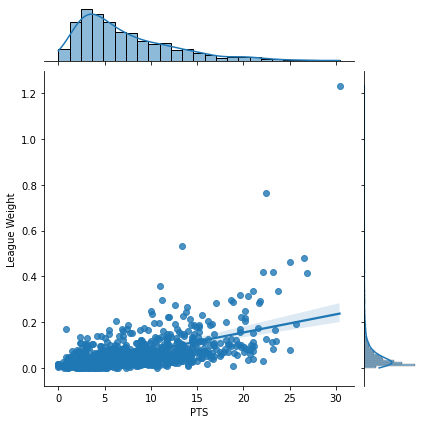

In [46]:
sns.jointplot(data=players_data, x='PTS', y='League Weight', kind="reg")

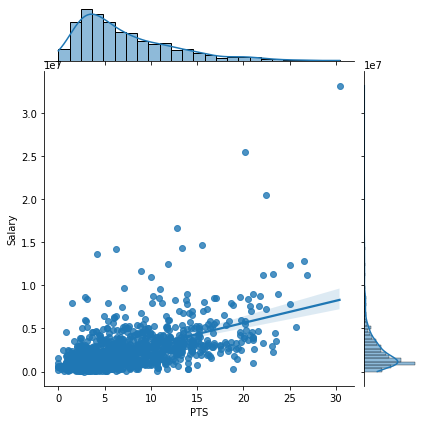

In [47]:
sns.jointplot(data=players_data, x='PTS', y='Salary', kind="reg")

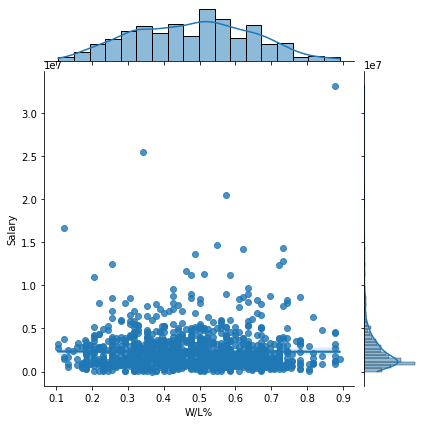

In [48]:
sns.jointplot(data=players_data, x='W/L%', y='Salary', kind="reg")

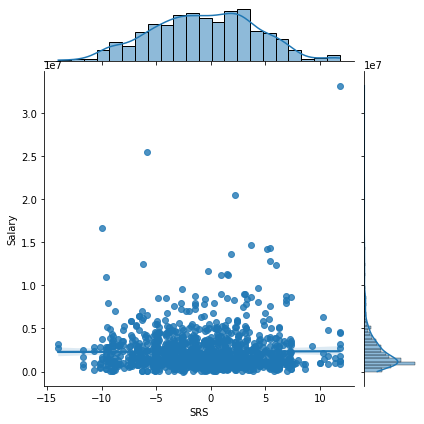

In [49]:
sns.jointplot(data=players_data, x='SRS', y='Salary', kind="reg")

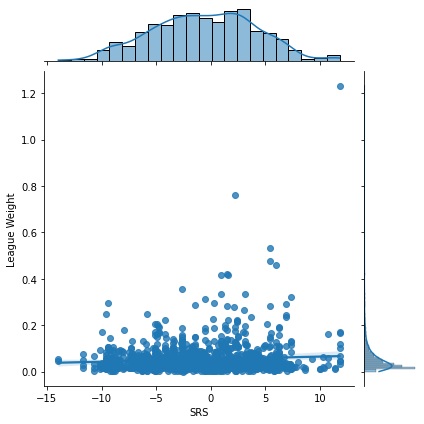

In [50]:
sns.jointplot(data=players_data, x='SRS', y='League Weight', kind="reg")

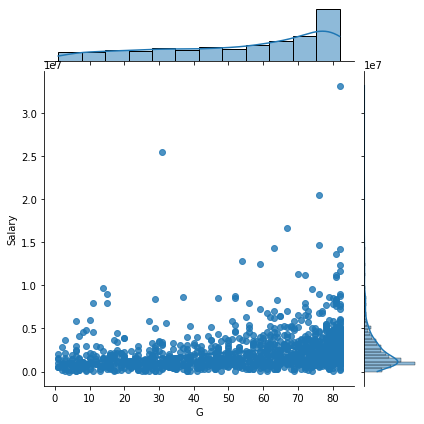

In [51]:
sns.jointplot(data=players_data, x='G', y='Salary', kind="reg")

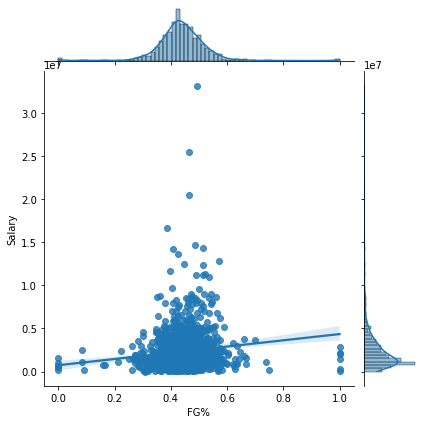

In [52]:
sns.jointplot(data=players_data, x='FG%', y='Salary', kind="reg")

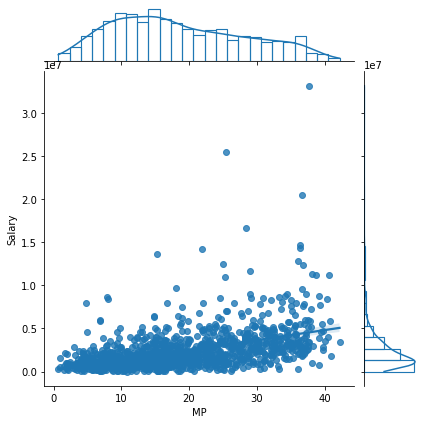

In [53]:
sns.jointplot(data=players_data, x='MP', y='Salary', kind='reg', marginal_kws=dict(bins=25, fill=False))

While many jointplots were created, I wanted to see how each relevant feature correlated with the player's Salary or League Weight for their given year. Some conclusions were made that will be talked about at the end of this notebook, but for now, we will continue looking at feature correlations.
<br>
<br>

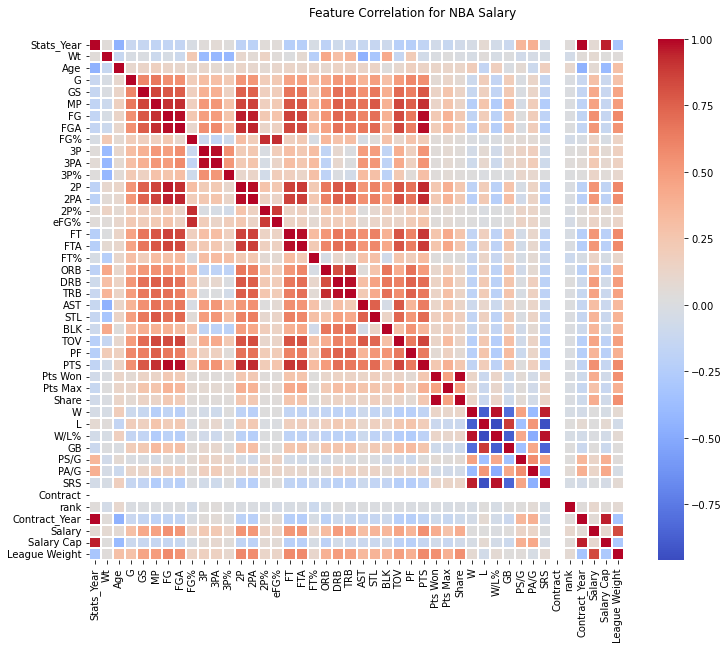

In [54]:
corrmat = players_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat, 2), ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for NBA Salary')

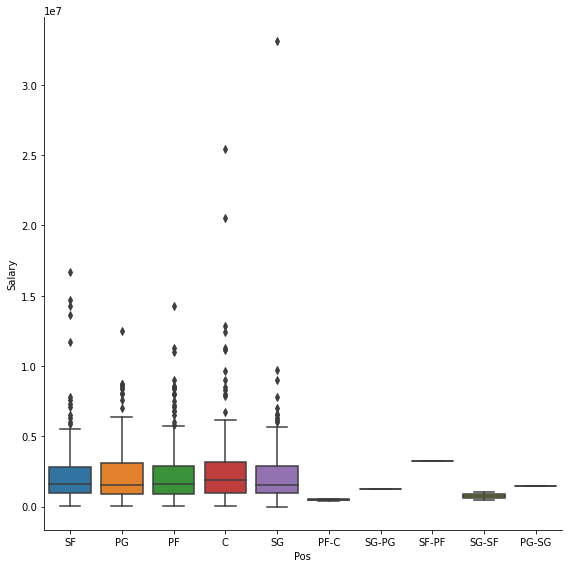

In [55]:
sns.catplot(data=players_data, x="Pos", y="Salary", kind="box", height=8)

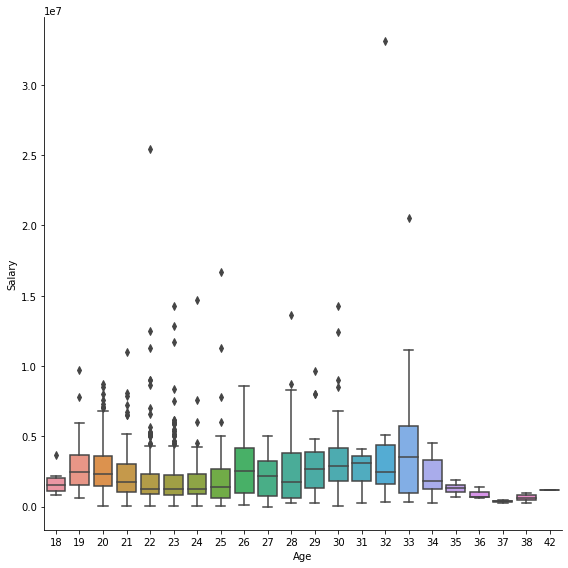

In [56]:
sns.catplot(data=players_data, x="Age", y="Salary", kind="box", height=8)

In [57]:
players_data.set_index('Team').Salary.sort_values(ascending=False).head()

Team
Chicago Bulls         33140000.0
Philadelphia 76ers    25467250.0
New York Knicks       20500000.0
Philadelphia 76ers    16698103.0
Houston Rockets       14700000.0
Name: Salary, dtype: float64

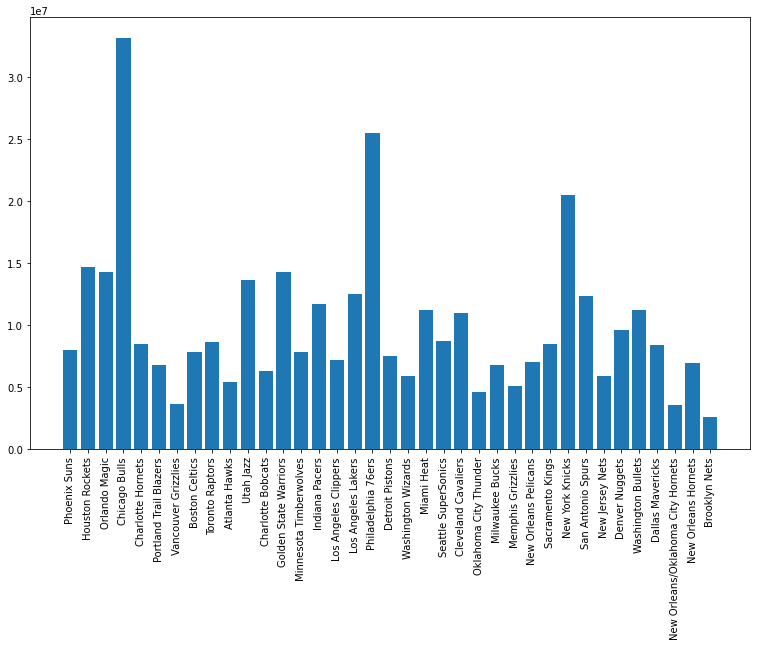

In [58]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
teams = players_data['Team']
salary = players_data['Salary']
ax.bar(teams,salary)
plt.xticks(rotation = 90)
plt.show()

In [59]:
players_data.groupby('Age')['Salary'].mean().to_frame().sort_values('Salary', ascending=False).reset_index()

,Age,Salary
0,33,5.499189e+06
1,32,4.728024e+06
2,30,3.832040e+06
3,29,3.108779e+06
4,26,3.027310e+06
5,28,2.787849e+06
6,19,2.782553e+06
7,20,2.766115e+06
8,31,2.598308e+06
9,21,2.226776e+06


### 3.5.1 Conclusions

At the beginning of the notebook, I wanted to explore a few questions that could help determine a player's salary in the NBA:<br>
Do the team's W/L% affect player's salaries?<br>
What are some features that determine salary?<br>
Does position affect a higher salary?<br>
On average, what is the age group that has the highest salaries?<br>
Which team has the highest total salary?<br>
<br>
I ran multiple jointplots through seaborn, a few boxplots, and a correlation heatmap. I had a feeling certain features of the dataset impacted salary more than others so used those ones, being 'PTS', 'W/L%', 'G', 'MP', 'POS', and 'Age'. There were a lot of data points in the DF, making it a lot to look at at once and at first glance. However, I chose to keep it all in to see how they interacted with each other. I tried to run a PCA, (I could totally be wrong on this) but it was showing the same data as shown above, so I removed it.<br>
<br>
'W/L%' and 'SRS' graphs are showing a pretty normal distribution on the jointplot, so while it may have some influence, it is not the main component to a player's salary. The main contributors to a players salary are the previous years salary, points, and minutes played. This all makes sense, because the more games the player plays, the better they are and the more points they are able to score, making them more all the more desirable, resulting in a higher pay for the following year.<br>
<br>
By running the boxplots, we were able to see, by position on average, pointguards make more money, but not by much. Position does not seem to influence a player's salary, although it could make them more desireable on a specific team, resulting in a higher pay. Team and age were other features also looked at and it seems that late 20s-early 30s is the best age range to get paid by the NBA. Additionally, the Chicago Bulls, Philadelphia 76ers, and the New York Knicks have the largest pay grades, but Chicago and all the other graphs were influenced by Michael Jordan, the greatest player the game has ever seen. Regardless, it is all situational.<br>
<br>
By adding in feature engineering we can account for possible outliers and incoming player's salaries. I will do that now.

## 3.6 Feature Engineering

In [60]:
players_data.columns

Index(['Player', 'Stats_Year', 'Ht', 'Wt', 'Colleges', 'Pos', 'Age', 'Tm',
       'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pts Won', 'Pts Max', 'Share', 'W',
       'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Contract', 'rank',
       'Contract_Year', 'Contract_Team', 'Salary', 'Salary Cap',
       'League Weight'],
      dtype='object')

In [61]:
condition = [(players_data['Salary'] < 5000000)]
choice = [0]
players_data['Binary'] = np.select(condition, choice, default=1)
players_data.head(5)

,Player,Stats_Year,Ht,Wt,Colleges,Pos,Age,Tm,Team,G,...,PA/G,SRS,Contract,rank,Contract_Year,Contract_Team,Salary,Salary Cap,League Weight,Binary
0,A.C. Green,1996,6-9,220.0,Oregon State,SF,32,PHO,Phoenix Suns,82,...,104.0,0.28,1,1,1997.0,Dallas Mavericks,5095088.0,26900000.0,0.189408,1
1,Aaron Brooks,2008,6-0,161.0,Oregon,PG,23,HOU,Houston Rockets,51,...,92.0,4.83,1,1,2009.0,Houston Rockets,1118520.0,57700000.0,0.019385,0
2,Aaron Gordon,2016,6-8,235.0,Arizona,PF,20,ORL,Orlando Magic,78,...,103.7,-1.68,1,2,2017.0,Orlando Magic,5504419.0,99093000.0,0.055548,1
3,Aaron Gray,2008,7-0,270.0,Pitt,C,23,CHI,Chicago Bulls,61,...,100.4,-3.19,1,1,2009.0,Chicago Bulls,1000497.0,57700000.0,0.017340,0
4,Aaron Harrison,2016,6-6,210.0,Kentucky,SG,21,CHO,Charlotte Hornets,21,...,100.7,2.36,1,1,2017.0,Charlotte Hornets,174570.0,99093000.0,0.001762,0


In [64]:
condition = [
        (players_data['Salary'] < 1000000),
        (players_data['Salary'] <= 5000000),
        (players_data['Salary'] <= 10000000)]
choice = [0, 1, 2]
players_data['Nominal'] = np.select(condition, choice, default=3)
players_data.head(10)

,Player,Stats_Year,Ht,Wt,Colleges,Pos,Age,Tm,Team,G,...,SRS,Contract,rank,Contract_Year,Contract_Team,Salary,Salary Cap,League Weight,Binary,Nominal
0,A.C. Green,1996,6-9,220.0,Oregon State,SF,32,PHO,Phoenix Suns,82,...,0.28,1,1,1997.0,Dallas Mavericks,5095088.0,26900000.0,0.189408,1,2
1,Aaron Brooks,2008,6-0,161.0,Oregon,PG,23,HOU,Houston Rockets,51,...,4.83,1,1,2009.0,Houston Rockets,1118520.0,57700000.0,0.019385,0,1
2,Aaron Gordon,2016,6-8,235.0,Arizona,PF,20,ORL,Orlando Magic,78,...,-1.68,1,2,2017.0,Orlando Magic,5504419.0,99093000.0,0.055548,1,2
3,Aaron Gray,2008,7-0,270.0,Pitt,C,23,CHI,Chicago Bulls,61,...,-3.19,1,1,2009.0,Chicago Bulls,1000497.0,57700000.0,0.017340,0,1
4,Aaron Harrison,2016,6-6,210.0,Kentucky,SG,21,CHO,Charlotte Hornets,21,...,2.36,1,1,2017.0,Charlotte Hornets,174570.0,99093000.0,0.001762,0,0
5,Aaron McKie,1996,6-5,209.0,Temple,SG,23,POR,Portland Trail Blazers,81,...,2.21,1,1,1997.0,Detroit Pistons,1235000.0,26900000.0,0.045911,0,1
6,Aaron Williams,1997,6-9,220.0,Xavier,PF-C,25,VAN,Vancouver Grizzlies,33,...,-10.17,1,1,1998.0,Seattle SuperSonics,575000.0,30000000.0,0.019167,0,0
7,Abdel Nader,2018,6-5,225.0,"Northern Illinois, Iowa State",SF,24,BOS,Boston Celtics,48,...,3.23,1,1,2019.0,Oklahoma City Thunder,1618520.0,109140000.0,0.014830,0,1
8,Acie Earl,1996,6-10,240.0,Iowa,C,25,TOR,Toronto Raptors,42,...,-7.20,1,1,1997.0,Milwaukee Bucks,1430000.0,26900000.0,0.053160,0,1
9,Acie Law,2008,6-3,195.0,Texas A&M,PG,23,ATL,Atlanta Hawks,56,...,-2.23,1,1,2009.0,Atlanta Hawks,2216160.0,57700000.0,0.038408,0,1


0    1129
1     107
Name: Binary, dtype: int64


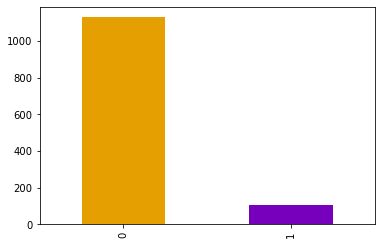

In [86]:
print(players_data.Binary.value_counts())
p = players_data.Binary.value_counts().plot(kind = "bar", color = ("#E69F00", "#7600bc"))

1    786
0    350
2     84
3     16
Name: Nominal, dtype: int64


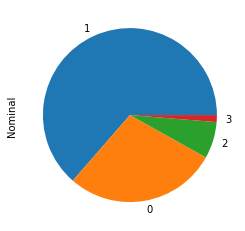

In [88]:
print(players_data.Nominal.value_counts())
p = players_data.Nominal.value_counts().plot(kind = "pie")

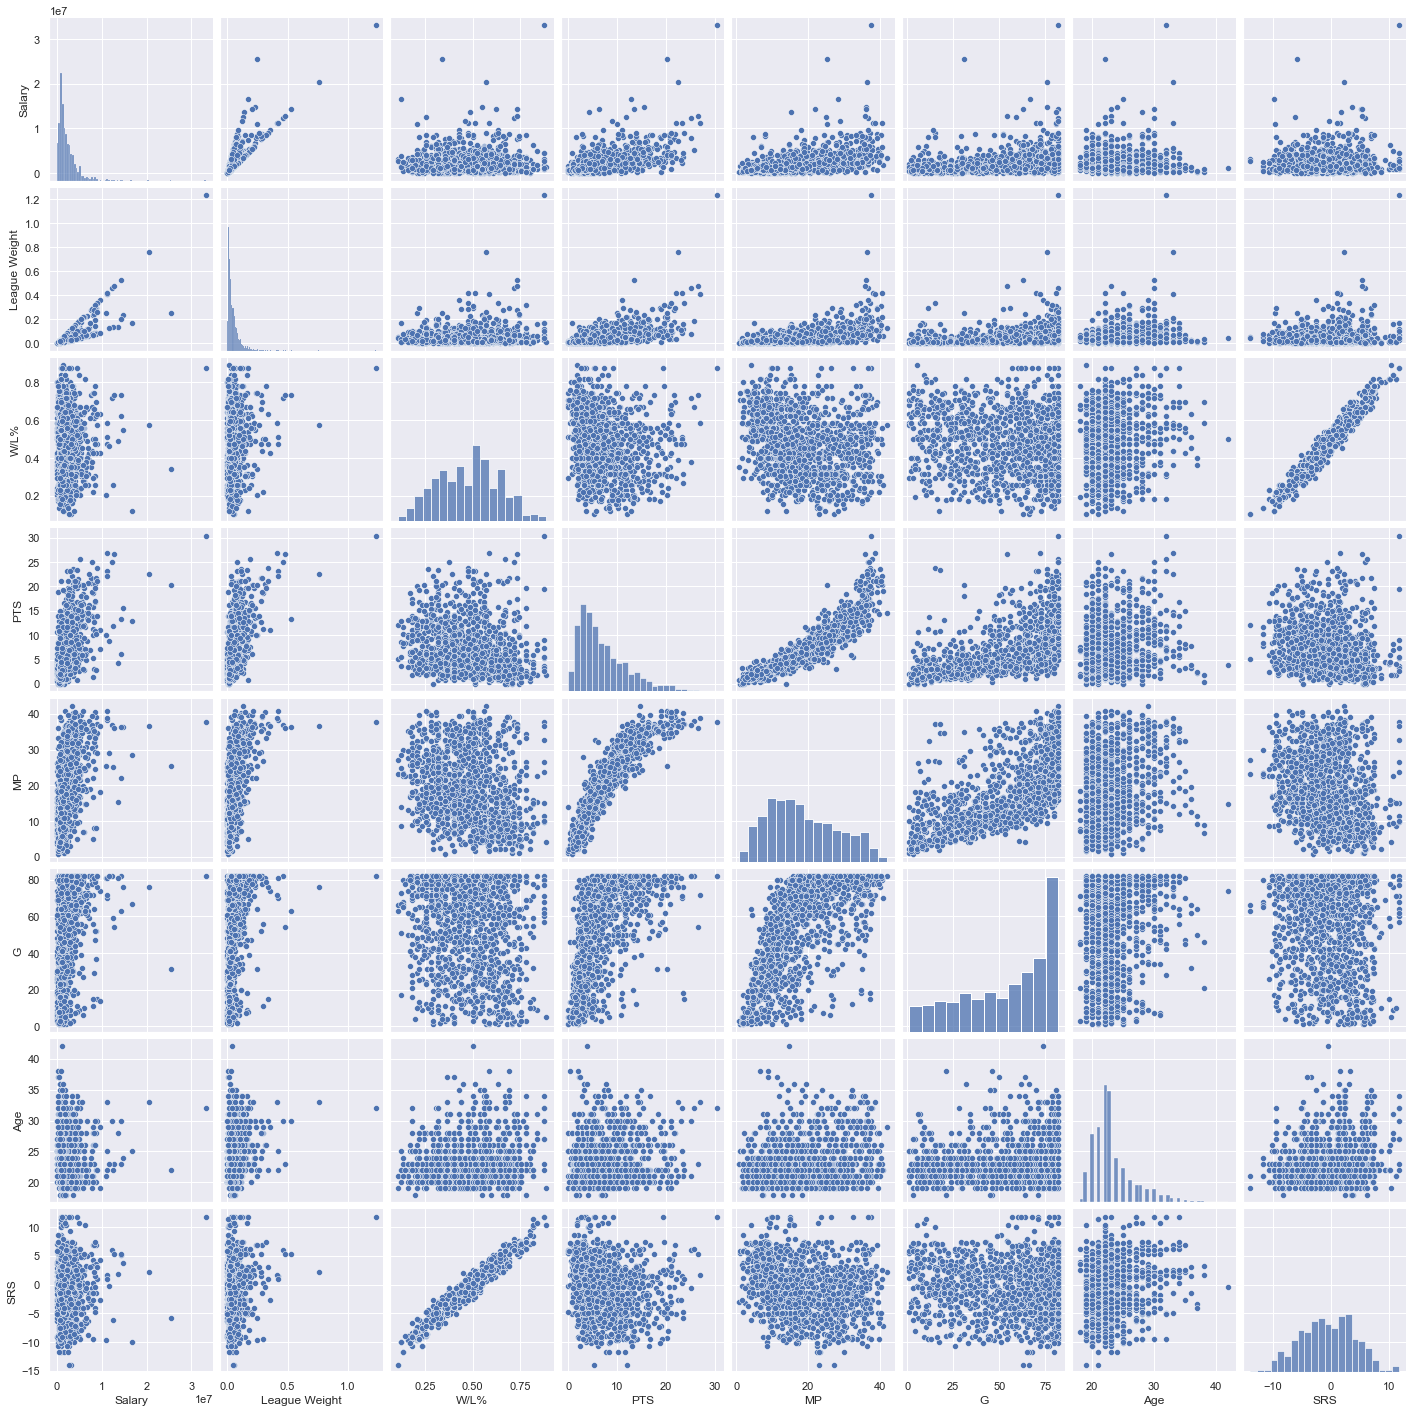

In [91]:
variables = ['Salary', 'League Weight', 'W/L%', 'PTS', 'MP', 'G', 'Pos', 'Age', 'SRS']

sns.set()
sns.pairplot(players_data[variables], height = 2.5)
plt.show()

In [100]:
x = players_data[['Salary', 'League Weight', 'W/L%', 'PTS', 'MP', 'G', 'Age', 'SRS']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

vif.round(1)

,VIF Factor,features
0,7.0,Salary
1,6.4,League Weight
2,47.3,W/L%
3,21.5,PTS
4,37.8,MP
5,10.7,G
6,48.9,Age
7,5.3,SRS


As expected, W/L%, Pts, MP, and Age all have high VIF Factors, meaning they pretty much explain the same meaning. So in the next round, we will be removing them from the list. Therefore, we will use League Weight, G, SRS, and Salary as target variables in modeling. 

In [101]:
x = players_data[['League Weight', 'G', 'SRS', 'Salary']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,5.2,League Weight
1,2.1,G
2,1.1,SRS
3,6.4,Salary


This all makes sense in terms of multicollinearity, especially with SRS having the lowest VIF Factor of 1.1.<br>
<br>
In the next notebook, 04 Pre-Processing and Training Development, we will focus on creating dummy variables for categorical values, standardize the magnitude of numeric features using a scaler, and splitting the data into testing and training datasets.